## Loading Data

In [ ]:
tourist_df.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id',
       ...
       'dist_orchard_road_ion_km', 'dist_chinatown_km', 'dist_little_india_km',
       'dist_clarke_quay_km', 'dist_singapore_botanic_gardens_km',
       'nearest_tourist_spot', 'distance_to_nearest_tourist_spot_km',
       'distance_to_nearest_tourist_spot_m', 'tourist_spot_distance_bin',
       'tourist_km'],
      dtype='object', length=113)

In [ ]:
geo_df.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,road,suburb,city,state,postcode,country,district,nearest_MRT,the_nearest_MRT_station,distance_to_nearest_MRT_km
0,71609,https://www.airbnb.com/rooms/71609,20250625193524,2025-06-26,city scrape,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,Simei Road,Tampines,Singapore,NaN,520153,Singapore,Tampines,Simei,Simei,0.66
1,71896,https://www.airbnb.com/rooms/71896,20250625193524,2025-06-27,previous scrape,B&B Room 1 near Airport & EXPO,NaN,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,Simei Rise,Tampines,Singapore,NaN,520163,Singapore,Tampines,Simei,Simei,0.84
2,71903,https://www.airbnb.com/rooms/71903,20250625193524,2025-06-27,city scrape,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,Meragi Road,Tampines,Singapore,NaN,520161,Singapore,Tampines,Simei,Simei,0.88
3,275343,https://www.airbnb.com/rooms/275343,20250625193524,2025-06-26,previous scrape,10min walk to MRT & a Cozy Room with window! (1),**IMPORTANT NOTES: READ BEFORE YOU BOOK! <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,Alexandra Road,Alexandra,Singapore,NaN,159948,Singapore,Alexandra,Queenstown,Queenstown,0.55
4,275344,https://www.airbnb.com/rooms/275344,20250625193524,2025-06-27,previous scrape,15 mins to Outram MRT Single Room (2),Lovely home for the special guest !,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,Hoy Fatt Road,Bukit Merah,Singapore,NaN,150050,Singapore,Bukit Merah,Redhill,Redhill,0.61


In [ ]:
geo_df['estimated_revenue_l365d'].sort_values()

,estimated_revenue_l365d
2226,0.0
2218,0.0
2219,0.0
2220,0.0
2221,0.0
...,...
3561,NaN
3566,NaN
3572,NaN
3573,NaN


In [ ]:
tourist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Columns: 112 entries, listing_id to tourist_spot_distance_bin
dtypes: float64(34), int64(29), object(49)
memory usage: 3.1+ MB


In [ ]:
tourist_df['last_scraped'] = pd.to_datetime(tourist_df['last_scraped'])

In [ ]:
tourist_df['last_scraped'].dt.month.sort_values()

,last_scraped
3647,6
3646,6
3645,6
3644,6
3643,6
...,...
3655,6
3656,6
3657,6
3658,6


## which region is most popular?

In [ ]:
tourist_df['estimated_occupancy_l365d'].mean()

np.float64(17.812790379885215)

In [ ]:
area_df = geo_df[['neighbourhood_cleansed','latitude','longitude']].groupby('neighbourhood_cleansed').median()
area_df

,latitude,longitude
neighbourhood_cleansed,,
Ang Mo Kio,1.375570,103.837373
Bedok,1.319579,103.914790
Bishan,1.353480,103.834174
Bukit Batok,1.357065,103.758485
Bukit Merah,1.284250,103.832606
Bukit Panjang,1.374660,103.770350
Bukit Timah,1.319993,103.787589
Central Water Catchment,1.352083,103.819210
Changi,1.358018,103.985142


In [ ]:
district_counts = geo_df['neighbourhood_cleansed'].value_counts()
top_10_percent_districts = district_counts.head(int(len(district_counts) * 0.1))
display(top_10_percent_districts)

,count
neighbourhood_cleansed,
River Valley,375
Kallang,301
Outram,279
Rochor,268


In [ ]:
# the supply of airbnb

airbnb_supply = geo_df['neighbourhood_cleansed'].value_counts()
airbnb_supply = pd.merge(airbnb_supply, area_df, on='neighbourhood_cleansed', how='left')
airbnb_supply

,count,latitude,longitude
neighbourhood_cleansed,,,
River Valley,375,1.296160,103.839110
Kallang,301,1.310951,103.861230
Outram,279,1.283350,103.843460
Rochor,268,1.303605,103.854030
Novena,231,1.319940,103.847511
Bukit Merah,215,1.284250,103.832606
Queenstown,215,1.287140,103.787390
Geylang,212,1.314185,103.882930
Downtown Core,204,1.281505,103.852610


In [ ]:
most_popluar_districts = geo_df[['listing_id','estimated_occupancy_l365d','neighbourhood_cleansed']].sort_values('estimated_occupancy_l365d',ascending=False)
most_popluar_districts

,listing_id,estimated_occupancy_l365d,neighbourhood_cleansed
2013,755422693666901841,255,Singapore River
2077,798224495747266527,255,Singapore River
2514,1083763116296837521,255,Marine Parade
2010,749758789682527413,255,Singapore River
1826,606329696219047813,255,Rochor
...,...,...,...
1247,40881888,0,Marine Parade
1248,40888220,0,Bedok
1249,40902252,0,Yishun
1250,40904017,0,Bukit Merah


In [ ]:
most_popluar_districts = most_popluar_districts.groupby('neighbourhood_cleansed').sum('estimated_occupancy_l365d').sort_values(by='estimated_occupancy_l365d',ascending=False)

In [ ]:
supply_demand = pd.merge(most_popluar_districts, airbnb_supply, on='neighbourhood_cleansed', how='left')
supply_demand

,listing_id,estimated_occupancy_l365d,count
neighbourhood_cleansed,,,
Singapore River,-2958080757710372645,8369,149
Outram,6692804574233438919,7043,279
Downtown Core,-1895336021815981921,6628,204
Rochor,5989294200942180314,5292,268
Geylang,-8578064278438247941,5009,212
Kallang,-6169731697865046274,4815,301
River Valley,4980361662795792010,4211,375
Novena,-2870698351183164160,4040,231
Queenstown,-1483212829541952513,3020,215


### supply-demand ratio

In [ ]:
supply_demand['occupancy_to_listing_ratio'] = supply_demand['estimated_occupancy_l365d']/supply_demand['count']
supply_demand.sort_values('occupancy_to_listing_ratio')

,listing_id,estimated_occupancy_l365d,count,occupancy_to_listing_ratio
neighbourhood_cleansed,,,,
Mandai,9932692,0,1,0.000000
Jurong East,-2006366889425787525,0,38,0.000000
Pioneer,24412725,0,1,0.000000
Changi,3942843781973709707,0,5,0.000000
Tuas,855442493268580583,0,2,0.000000
Western Water Catchment,1025281098953986811,0,3,0.000000
Sungei Kadut,2562293819518411659,0,3,0.000000
Sengkang,3888636089353883715,0,15,0.000000
Bukit Batok,-6537661872638357132,0,30,0.000000


In [ ]:
supply_demand['neighbourhood'] = supply_demand.index

In [ ]:
supply_demand.sort_values(by='occupancy_to_listing_ratio',ascending=False)['occupancy_to_listing_ratio'].sum()

np.float64(636.8483721797829)

In [ ]:
supply_demand.sort_values(by='occupancy_to_listing_ratio',ascending=False)

,listing_id,estimated_occupancy_l365d,count,occupancy_to_listing_ratio,neighbourhood
neighbourhood_cleansed,,,,,
Marina South,2847719537909862852,354,4,88.500000,Marina South
Singapore River,-2958080757710372645,8369,149,56.167785,Singapore River
Punggol,7873896385988932916,439,12,36.583333,Punggol
Museum,8727576213300556295,582,17,34.235294,Museum
Downtown Core,-1895336021815981921,6628,204,32.490196,Downtown Core
Bukit Timah,1150690595083615028,1359,49,27.734694,Bukit Timah
Outram,6692804574233438919,7043,279,25.243728,Outram
Geylang,-8578064278438247941,5009,212,23.627358,Geylang
Hougang,1973368995036476594,940,41,22.926829,Hougang


In [ ]:
supply_demand.to_csv("supply-demand.csv")

In [ ]:
supply_demand.columns

Index(['listing_id', 'estimated_occupancy_l365d', 'latitude', 'longitude',
       'count', 'demand_supply_ratio'],
      dtype='object')

## region demand-supply map

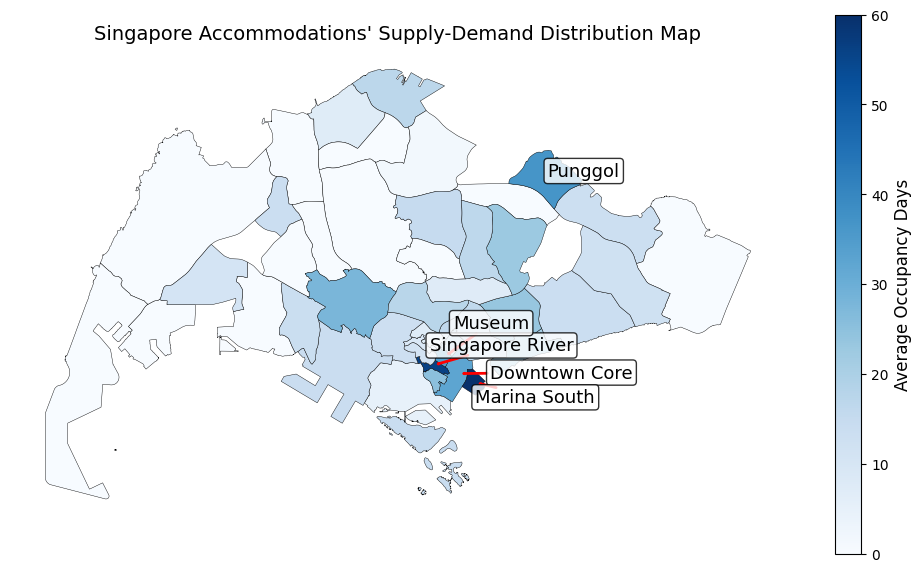

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from adjustText import adjust_text

# 載入地區邊界 GeoJSON
geo_df = gpd.read_file("neighbourhoods.geojson")

# 載入 CSV 數據
data_df = pd.read_csv("supply-demand.csv")

# 合併兩者（根據 neighbourhood 名稱）
merged = geo_df.merge(data_df, on="neighbourhood")

# 建立圖形與座標軸
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# 畫出分佈圖
merged.plot(
    column="occupancy_to_listing_ratio",
    cmap="Blues",
    edgecolor="black",
    linewidth=0.3,
    vmin=0,
    vmax=60,
    ax=ax
)

# ✅ 原本標註（包含 Downtown Core）
filtered = merged[merged["occupancy_to_listing_ratio"] > 30]

# ✅ 建立標註文字物件列表（只標註一次 Downtown Core）
texts = []
special_labels_added = ["Downtown Core", "Singapore River", "Museum"]  # 用 set 追蹤已標註過的特殊區域

for _, row in filtered.iterrows():
    name = row["neighbourhood"]

    point = row.geometry.representative_point().coords[0]
    text_obj = ax.text(
            point[0], point[1], name,
            fontsize=13,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", alpha=0.8)
        )

    texts.append(text_obj)
# ✅ 自動調整標註位置並加箭頭
adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="->", color="red", lw=2)
)

# 建立 colorbar 對應的 ScalarMappable
sm = mpl.cm.ScalarMappable(
    cmap="Blues",
    norm=plt.Normalize(vmin=0, vmax=60)
)
sm._A = []

# 加入 colorbar 並加上標籤
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Average Occupancy Days", fontsize=12)

# 移除座標軸
ax.set_axis_off()

# 加上標題
plt.title("Singapore Accommodations' Supply-Demand Distribution Map", fontsize=14)

# 顯示圖表
plt.tight_layout()
plt.show()


### reason of the result

/tmp/ipython-input-1627106527.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


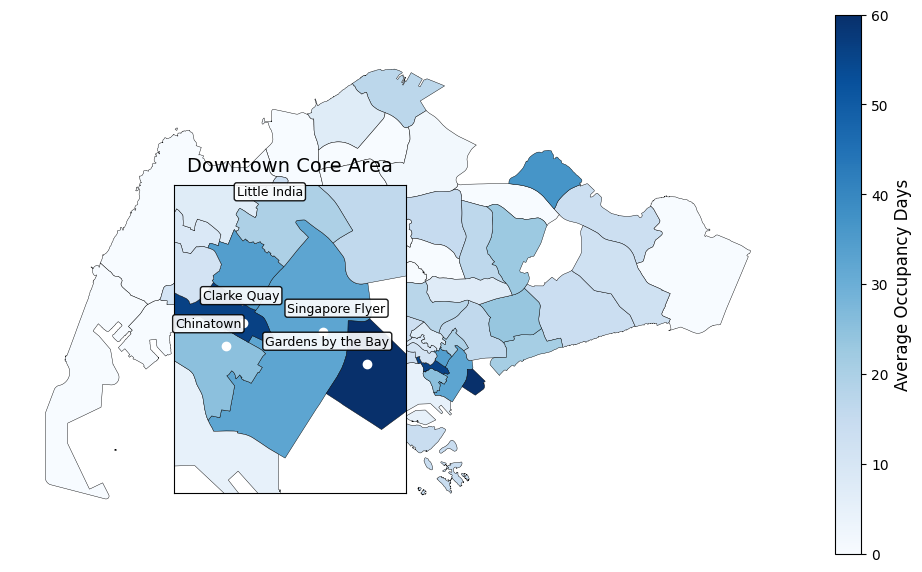

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# 載入地區邊界 GeoJSON
geo_df = gpd.read_file("neighbourhoods.geojson")

# 載入 CSV 數據
data_df = pd.read_csv("supply-demand.csv")

# 合併兩者（根據 neighbourhood 名稱）
merged = geo_df.merge(data_df, on="neighbourhood")

# 建立主地圖
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged.plot(
    column="occupancy_to_listing_ratio",
    cmap="Blues",
    edgecolor="black",
    linewidth=0.3,
    vmin=0,
    vmax=60,
    ax=ax
)

# ✅ 建立放大鏡視窗（inset）
axins = inset_axes(ax, width="65%", height="65%", loc="lower left", borderpad=2)

# ✅ 畫出放大區域（以 Downtown Core 為例）
focus_area = merged[merged["neighbourhood"] == "Downtown Core"]
merged.plot(
    column="occupancy_to_listing_ratio",
    cmap="Blues",
    edgecolor="black",
    linewidth=0.3,
    vmin=0,
    vmax=60,
    ax=axins
)

# ✅ 設定放大鏡範圍
minx, miny, maxx, maxy = focus_area.total_bounds
axins.set_xlim(minx - 0.005, maxx + 0.005)
axins.set_ylim(miny - 0.005, maxy + 0.005)
axins.set_title("Zoom: Downtown Core", fontsize=10)
axins.set_xticks([])
axins.set_yticks([])

# ✅ 加連線框線
#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", lw=1)

from adjustText import adjust_text

# ✅ 地標清單（名稱 + 經緯度）
landmarks = {
    "Gardens by the Bay": (103.864273, 1.282375),
    "Singapore Flyer": (103.8579, 1.2870),
    "Little India": (103.849273551709, 1.30684265),
    "Clarke Quay": (103.846427586531, 1.2882413),
    "Chinatown": (103.8440, 1.2849),
}

# ✅ 偏移方向（文字放喺圓點上方）
offset_y = 0.002  # 緯度向上偏移
texts = []

for name, (lon, lat) in landmarks.items():
    # 畫圓點
    axins.plot(lon, lat, marker='o', color='white', markersize=6, zorder=4)

    # 加文字標籤（上方）
    text = axins.text(
        lon, lat + offset_y, name,
        fontsize=9,
        ha="center", va="bottom",
        zorder=5,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", alpha=0.9)
    )
    texts.append(text)

# ✅ 自動微調避免重疊（可選）
adjust_text(texts, ax=axins, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

# ✅ 色階圖例（縮小比例）
sm = mpl.cm.ScalarMappable(
    cmap="Blues",
    norm=plt.Normalize(vmin=0, vmax=60)
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Average Occupancy Days", fontsize=12)

# ✅ 美化地圖
ax.set_axis_off()
plt.title("Downtown Core Area", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


## Impact of proximity to attractions

In [ ]:
# supplies near different tourist spots

tourist_supply = tourist_df['nearest_tourist_spot'].value_counts()
tourist_supply

,count
nearest_tourist_spot,
Little India,929
Singapore Flyer,566
Chinatown,564
Singapore Botanic Gardens,420
Clarke Quay,405
Orchard Road (ION),335
Singapore Zoo,255
Esplanade – Theatres,69
Sentosa (Universal Studios),65


In [ ]:
most_popluar_tourist = tourist_df[['listing_id','nearest_tourist_spot','estimated_occupancy_l365d']].sort_values('estimated_occupancy_l365d',ascending=False)
most_popluar_tourist

,listing_id,nearest_tourist_spot,estimated_occupancy_l365d
2013,755422693666901841,Clarke Quay,255
2077,798224495747266527,Clarke Quay,255
2514,1083763116296837521,Singapore Flyer,255
2010,749758789682527413,Clarke Quay,255
1826,606329696219047813,Little India,255
...,...,...,...
1247,40881888,Singapore Flyer,0
1248,40888220,Singapore Flyer,0
1249,40902252,Singapore Zoo,0
1250,40904017,Chinatown,0


In [ ]:
tourist_demand = most_popluar_tourist.groupby('nearest_tourist_spot').sum('estimated_occupancy_l365d').sort_values(by='estimated_occupancy_l365d',ascending=False)
tourist_demand

,listing_id,estimated_occupancy_l365d
nearest_tourist_spot,,
Little India,5720551286406661981,15304
Chinatown,-2008881871466013136,12482
Singapore Flyer,-16125593628719356,11307
Clarke Quay,-7994914807964980528,10312
Singapore Botanic Gardens,-5365679401392492060,5965
Esplanade – Theatres,6413773446892586357,3040
Orchard Road (ION),-4034252417155981870,2656
Singapore Zoo,-3283634934270758743,2519
Sentosa (Universal Studios),4147458834536466165,799


In [ ]:
tourist_demand = pd.merge(tourist_demand, tourist_supply, on='nearest_tourist_spot', how='left')
tourist_demand

,listing_id,estimated_occupancy_l365d,count
nearest_tourist_spot,,,
Little India,5720551286406661981,15304,929
Chinatown,-2008881871466013136,12482,564
Singapore Flyer,-16125593628719356,11307,566
Clarke Quay,-7994914807964980528,10312,405
Singapore Botanic Gardens,-5365679401392492060,5965,420
Esplanade – Theatres,6413773446892586357,3040,69
Orchard Road (ION),-4034252417155981870,2656,335
Singapore Zoo,-3283634934270758743,2519,255
Sentosa (Universal Studios),4147458834536466165,799,65


### supply-demand ratio

In [ ]:
tourist_demand['occupancy_to_listing_ratio'] = (tourist_demand['estimated_occupancy_l365d']/tourist_demand['count'])
tourist_demand.sort_values('occupancy_to_listing_ratio',ascending=False)

,listing_id,estimated_occupancy_l365d,count,occupancy_to_listing_ratio
nearest_tourist_spot,,,,
Gardens by the Bay,2847719537909862852,354,4,88.500000
Esplanade – Theatres,6413773446892586357,3040,69,44.057971
Clarke Quay,-7994914807964980528,10312,405,25.461728
Chinatown,-2008881871466013136,12482,564,22.131206
Singapore Flyer,-16125593628719356,11307,566,19.977032
Little India,5720551286406661981,15304,929,16.473628
Singapore Botanic Gardens,-5365679401392492060,5965,420,14.202381
Sentosa (Universal Studios),4147458834536466165,799,65,12.292308
Singapore Zoo,-3283634934270758743,2519,255,9.878431


In [ ]:
# change to percentage

tourist_demand['occupancy_to_listing_ratio'] = (tourist_demand['estimated_occupancy_l365d']/tourist_demand['count'])/365*100
tourist_demand.sort_values('occupancy_to_listing_ratio',ascending=False)

,listing_id,estimated_occupancy_l365d,count,occupancy_to_listing_ratio
nearest_tourist_spot,,,,
Gardens by the Bay,2847719537909862852,354,4,24.246575
Esplanade – Theatres,6413773446892586357,3040,69,12.070677
Clarke Quay,-7994914807964980528,10312,405,6.975816
Chinatown,-2008881871466013136,12482,564,6.063344
Singapore Flyer,-16125593628719356,11307,566,5.473159
Little India,5720551286406661981,15304,929,4.513323
Singapore Botanic Gardens,-5365679401392492060,5965,420,3.891063
Sentosa (Universal Studios),4147458834536466165,799,65,3.367756
Singapore Zoo,-3283634934270758743,2519,255,2.706420


### Relationship between price, occupancy rate and distance

In [ ]:
def km_bin(input):
    if input < 1:
        return '< 1km'
    elif 1 <= input <= 2:
        return '1-2 km'
    else:
        return '>2km'

In [ ]:
tourist_df['tourist_km'] = tourist_df['distance_to_nearest_tourist_spot_km']

In [ ]:
tourist_df['tourist_km'] = tourist_df['tourist_km'].apply(km_bin)

In [ ]:
tourist_df['price_x'] = tourist_df['price_x'].str.replace(',',"")

In [ ]:
tourist_df['price_x'] = tourist_df['price_x'].str.replace('$',"")

In [ ]:
tourist_df['price_x'] = tourist_df['price_x'].astype(float)

In [ ]:
# how many bedroom has the most?

bedroom_counts = tourist_df.groupby('bedrooms').size().reset_index(name='count')
total_listings = bedroom_counts['count'].sum()
bedroom_counts['percentage'] = (bedroom_counts['count'] / total_listings) * 100
display(bedroom_counts)

,bedrooms,count,percentage
0,0.0,218,6.440177
1,1.0,2457,72.584934
2,2.0,457,13.500739
3,3.0,189,5.583456
4,4.0,49,1.447563
5,5.0,9,0.265879
6,6.0,5,0.147710
7,7.0,1,0.029542


In [ ]:
# Overall median price

tourist_df.groupby('tourist_km')['price_x'].median()

,price_x
tourist_km,
1-2 km,174.0
< 1km,187.0
>2km,118.0


In [ ]:
# Overall supply

tourist_df.groupby('tourist_km')['listing_id'].count()

,listing_id
tourist_km,
1-2 km,1016
< 1km,1170
>2km,1473


In [ ]:
# Overall occupancy

tourist_df.groupby('tourist_km')['estimated_occupancy_l365d'].sum()

,estimated_occupancy_l365d
tourist_km,
1-2 km,14968
< 1km,27432
>2km,22777


In [ ]:
# median price in Chinatown

tourist_df[tourist_df['nearest_tourist_spot']=='Chinatown'].groupby('tourist_km')['price_x'].median()

,price_x
tourist_km,
1-2 km,189.0
< 1km,125.0
>2km,150.0


In [ ]:
# supply in Chinatown

tourist_df[tourist_df['nearest_tourist_spot']=='Chinatown'].groupby('tourist_km').count()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,dist_esplanade_theatres_km,dist_orchard_road_ion_km,dist_chinatown_km,dist_little_india_km,dist_clarke_quay_km,dist_singapore_botanic_gardens_km,nearest_tourist_spot,distance_to_nearest_tourist_spot_km,distance_to_nearest_tourist_spot_m,tourist_spot_distance_bin
tourist_km,,,,,,,,,,,,,,,,,,,,,
1-2 km,215,215,215,215,215,215,210,106,215,215,...,215,215,215,215,215,215,215,215,215,215
< 1km,346,346,346,346,346,346,335,215,346,346,...,346,346,346,346,346,346,346,346,346,346
>2km,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
# occupancy in Chinatown

tourist_df.groupby('tourist_km')['estimated_occupancy_l365d']
tourist_df[tourist_df['nearest_tourist_spot']=='Chinatown'].groupby('tourist_km')['estimated_occupancy_l365d'].sum()

,estimated_occupancy_l365d
tourist_km,
1-2 km,4018
< 1km,8464
>2km,0


### Property price VS Airbnb prices (one bedroom)

popular tourist spots

In [ ]:
# median price in 1 km of Little India

tourist_df[(tourist_df['nearest_tourist_spot']=='Little India') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

117.0

In [ ]:
# median price between 1-2 km in Little India

tourist_df[(tourist_df['nearest_tourist_spot']=='Little India') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

112.0

In [ ]:
# median price in 1 km of Chinatown

tourist_df[(tourist_df['nearest_tourist_spot']=='Chinatown') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].dropna().median()

76.0

In [ ]:
# median price between 1-2 km in Chinatown

tourist_df[(tourist_df['nearest_tourist_spot']=='Chinatown') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].dropna().median()

180.0

In [ ]:
# median price in 1 km of Singapore Flyer

tourist_df[(tourist_df['nearest_tourist_spot']=='Singapore Flyer') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

119.0

In [ ]:
# median price between 1-2 km in Singapore Flyer

tourist_df[(tourist_df['nearest_tourist_spot']=='Singapore Flyer') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

172.0

In [ ]:
# median price in 1 km of Clarke Quay

tourist_df[(tourist_df['nearest_tourist_spot']=='Clarke Quay') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

176.0

In [ ]:
# median price between 1-2 km in Clarke Quay

tourist_df[(tourist_df['nearest_tourist_spot']=='Clarke Quay') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

175.0

potential tourist spots

In [ ]:
# median price in 1 km of Gardens by the Bay

tourist_df[(tourist_df['nearest_tourist_spot']=='Gardens by the Bay') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

506.0

In [ ]:
# median price between 1-2 km in Gardens by the Bay

tourist_df[(tourist_df['nearest_tourist_spot']=='Gardens by the Bay') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

nan

In [ ]:
# reason of nan price between 1-2 km in Gardens by the Bay

tourist_df[(tourist_df['nearest_tourist_spot']=='Gardens by the Bay') & (tourist_df['tourist_km'] == '1-2 km')]

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,dist_orchard_road_ion_km,dist_chinatown_km,dist_little_india_km,dist_clarke_quay_km,dist_singapore_botanic_gardens_km,nearest_tourist_spot,distance_to_nearest_tourist_spot_km,distance_to_nearest_tourist_spot_m,tourist_spot_distance_bin,tourist_km


In [ ]:
# median price in 1 km of Esplanade – Theatres

tourist_df[(tourist_df['nearest_tourist_spot']=='Esplanade – Theatres') & (tourist_df['tourist_km'] == '< 1km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

173.0

In [ ]:
# median price between 1-2 km in Esplanade – Theatres

tourist_df[(tourist_df['nearest_tourist_spot']=='Esplanade – Theatres') & (tourist_df['tourist_km'] == '1-2 km') & (tourist_df['bedrooms'] == 1.0)]['price_x'].median()

125.0

### graph: Property VS airbnb

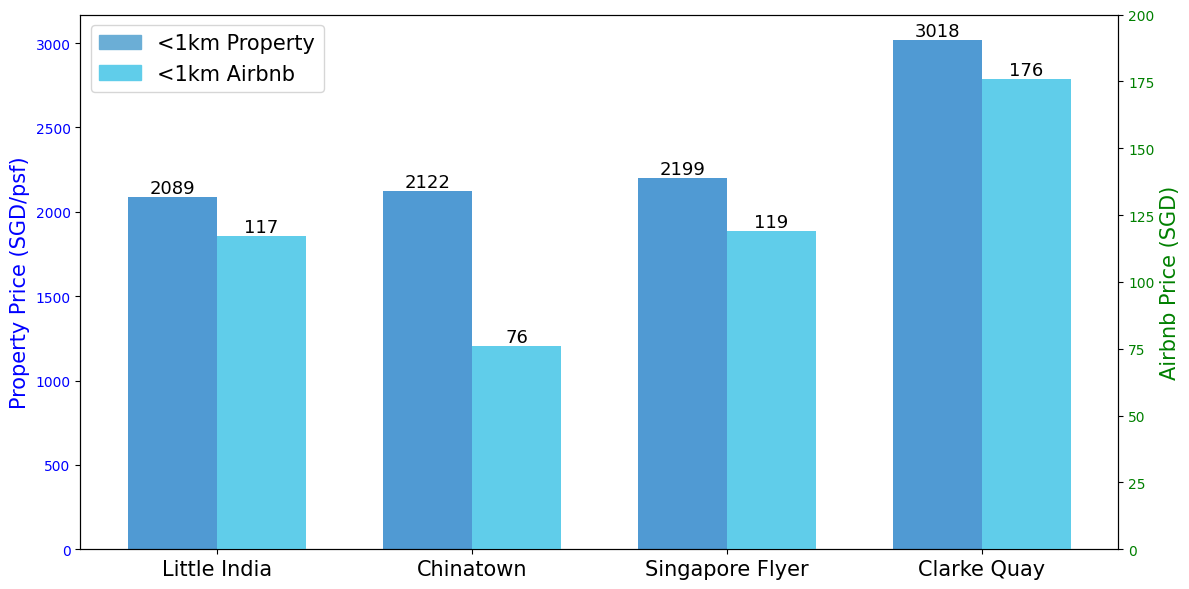

In [ ]:
# median price of property VS airbnb in 1km

import matplotlib.pyplot as plt
import numpy as np

# 景點名稱
spots = ['Little India', 'Chinatown', 'Singapore Flyer', 'Clarke Quay']
x = np.arange(len(spots))  # X 軸位置

# 樓價中位數（SGD/平方英尺）
property_lt1km = [2089, 2122, 2199, 3018]

# Airbnb 價格（SGD）
airbnb_lt1km = [117, 76, 119, 176]

# 棒圖寬度
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# 左側 Y 軸：樓價
ax1.set_ylabel('Property Price (SGD/psf)', color='blue',fontsize=15)
bars1 = ax1.bar(x - width/2, property_lt1km, width, label='<1km Property', color='#509ad3')
ax1.tick_params(axis='y', labelcolor='blue')

# 右側 Y 軸：Airbnb 價格
ax2 = ax1.twinx()
ax2.set_ylabel('Airbnb Price (SGD)', color='green',fontsize=15)
ax2.set_ylim(0, 200)
bars2 = ax2.bar(x + width/2, airbnb_lt1km, width, label='<1km Airbnb', color='#60cdea')
ax2.tick_params(axis='y', labelcolor='green')

# 加上數字標籤函式
def add_labels(bars, ax, fmt="{:.0f}"):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            fmt.format(height),
            ha='center',
            va='bottom',
            fontsize=13
        )

# 加上標籤
add_labels(bars1, ax1)
add_labels(bars2, ax2)

# X 軸與標題
ax1.set_xticks(x)
ax1.set_xticklabels(spots,fontsize=15)

# 圖例
bars = [
    plt.Rectangle((0,0),1,1,color='#6baed6'),
    plt.Rectangle((0,0),1,1,color='#60cdea'),
]
labels = ['<1km Property', '<1km Airbnb']
plt.legend(bars, labels, loc='upper left',fontsize=15)

plt.tight_layout()
plt.show()


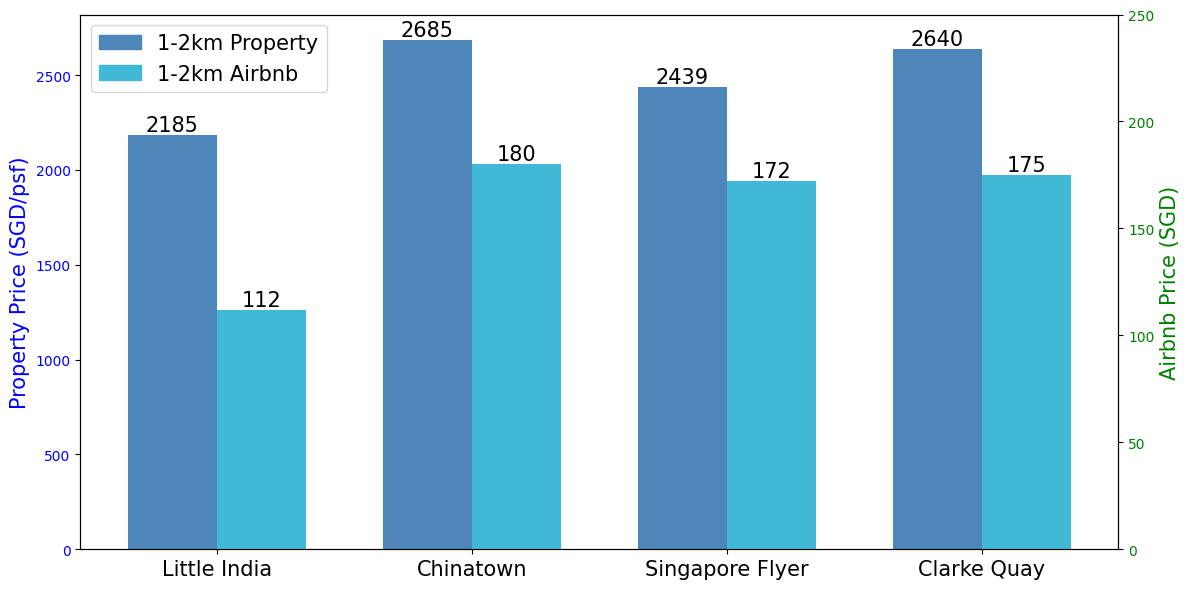

In [ ]:
# median price of property VS airbnb between 1-2 km

import matplotlib.pyplot as plt
import numpy as np

# 景點名稱
spots = ['Little India', 'Chinatown', 'Singapore Flyer', 'Clarke Quay']
x = np.arange(len(spots))  # X 軸位置

# 樓價中位數（SGD/平方英尺）
property_1to2km = [2185, 2685, 2439, 2640]

# Airbnb 價格（SGD）
airbnb_1to2km = [112, 180, 172, 175]

# 棒圖寬度
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# 左側 Y 軸：樓價
ax1.set_ylabel('Property Price (SGD/psf)', color='blue',fontsize=15)
bars2 = ax1.bar(x - width/2, property_1to2km, width, label='1–2km Property', color='#4d87b9')
ax1.tick_params(axis='y', labelcolor='blue')

# 右側 Y 軸：Airbnb 價格
ax2 = ax1.twinx()
ax2.set_ylabel('Airbnb Price (SGD)', color='green',fontsize=15)
ax2.set_ylim(0, 250)
bars4 = ax2.bar(x + width/2, airbnb_1to2km, width, label='1–2km Airbnb', color='#41b8d5')
ax2.tick_params(axis='y', labelcolor='green')

# 加上數字標籤函式
def add_labels(bars, ax, fmt="{:.0f}"):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            fmt.format(height),
            ha='center',
            va='bottom',
            fontsize=15
        )

# 加上標籤
add_labels(bars2, ax1)
add_labels(bars4, ax2)

# X 軸與標題
ax1.set_xticks(x)
ax1.set_xticklabels(spots,fontsize=15)

# 圖例
bars = [
    plt.Rectangle((0,0),1,1,color='#4d87b9'),
    plt.Rectangle((0,0),1,1,color='#41b8d5'),
]
labels = ['1-2km Property', '1-2km Airbnb']
plt.legend(bars, labels, loc='upper left',fontsize=15)

plt.tight_layout()
plt.show()


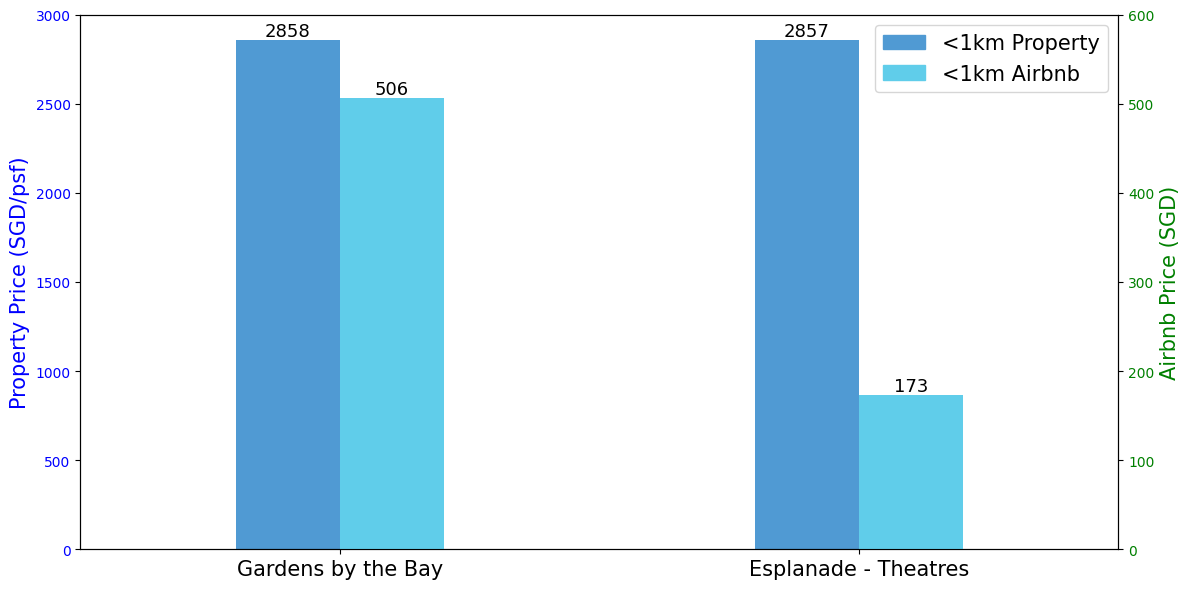

In [ ]:
# median price of property VS airbnb in 1km

import matplotlib.pyplot as plt
import numpy as np

# 景點名稱
spots = ['Gardens by the Bay', 'Esplanade - Theatres']
x = np.arange(len(spots))  # X 軸位置

# 樓價中位數（SGD/平方英尺）
property_lt1km = [2858, 2857]
# Airbnb 價格（SGD）
airbnb_lt1km = [506, 173]

# 棒圖寬度
width = 0.2

fig, ax1 = plt.subplots(figsize=(12, 6))

# 左側 Y 軸：樓價
ax1.set_ylabel('Property Price (SGD/psf)', color='blue', fontsize=15)
bars1 = ax1.bar(x - width/2, property_lt1km, width, label='<1km Property', color='#509ad3')
ax1.tick_params(axis='y', labelcolor='blue')

# 右側 Y 軸：Airbnb 價格
ax2 = ax1.twinx()
ax2.set_ylabel('Airbnb Price (SGD)', color='green', fontsize=15)
ax2.set_ylim(0, 600)
bars2 = ax2.bar(x + width/2, airbnb_lt1km, width, label='<1km Airbnb', color='#60cdea')
ax2.tick_params(axis='y', labelcolor='green')

# 加上數字標籤函式
def add_labels(bars, ax, fmt="{:.0f}"):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            fmt.format(height),
            ha='center',
            va='bottom',
            fontsize=13
        )

# 加上標籤
add_labels(bars1, ax1)
add_labels(bars2, ax2)

# X 軸與標題
ax1.set_xticks(x)
ax1.set_xticklabels(spots, fontsize=15)
ax1.set_xlim(-0.5, len(spots) - 0.5)

# 圖例
bars = [
    plt.Rectangle((0,0),1,1,color='#509ad3'),
    plt.Rectangle((0,0),1,1,color='#60cdea'),
]
labels = ['<1km Property', '<1km Airbnb']
plt.legend(bars, labels, loc='upper right' ,fontsize=15)

plt.tight_layout()
plt.show()

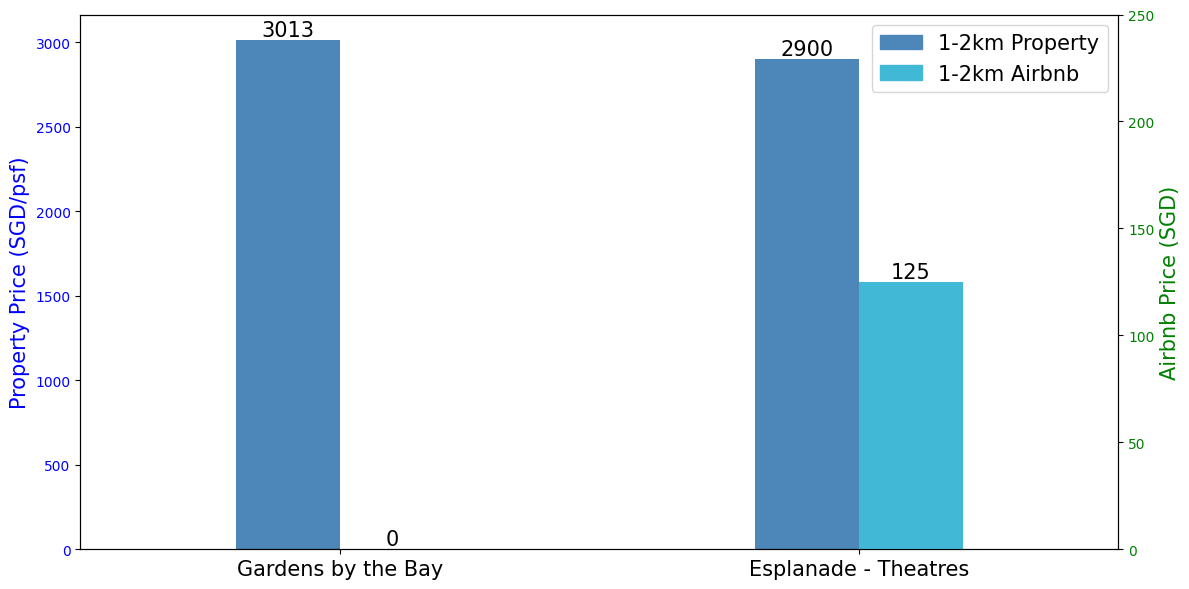

In [ ]:
# median price of property VS airbnb between 1-2 km

import matplotlib.pyplot as plt
import numpy as np

# 景點名稱
spots = ['Gardens by the Bay', 'Esplanade - Theatres']
x = np.arange(len(spots))  # X 軸位置

# 樓價中位數（SGD/平方英尺）
property_1to2km = [3013, 2900]

# Airbnb 價格（SGD）
airbnb_1to2km = [0, 125]

# 棒圖寬度
width = 0.2
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左側 Y 軸：樓價
ax1.set_ylabel('Property Price (SGD/psf)', color='blue',fontsize=15)
bars2 = ax1.bar(x - width/2, property_1to2km, width, label='1–2km Property', color='#4d87b9')
ax1.tick_params(axis='y', labelcolor='blue')

# 右側 Y 軸：Airbnb 價格
ax2 = ax1.twinx()
ax2.set_ylabel('Airbnb Price (SGD)', color='green',fontsize=15)
ax2.set_ylim(0, 250)
bars4 = ax2.bar(x + width/2, airbnb_1to2km, width, label='1–2km Airbnb', color='#41b8d5')
ax2.tick_params(axis='y', labelcolor='green')

# 加上數字標籤函式
def add_labels(bars, ax, fmt="{:.0f}"):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            fmt.format(height),
            ha='center',
            va='bottom',
            fontsize=15
        )

# 加上標籤
add_labels(bars2, ax1)
add_labels(bars4, ax2)

# X 軸與標題
ax1.set_xticks(x)
ax1.set_xticklabels(spots,fontsize=15)
ax1.set_xlim(-0.5, len(spots) - 0.5)

# 圖例
bars = [
    plt.Rectangle((0,0),1,1,color='#4d87b9'),
    plt.Rectangle((0,0),1,1,color='#41b8d5'),
]

labels = ['1-2km Property', '1-2km Airbnb']
plt.legend(bars, labels, loc='upper right',fontsize=15)

plt.tight_layout()
plt.show()